In [293]:
import warnings
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [294]:
df=pd.read_csv('data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [295]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [296]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [297]:
# Convert the 'diagnosis' column to binary: Malignant (M) -> 1, Benign (B) -> 0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Drop the 'id' column since it's just an identifier and not useful for analysis
df = df.drop(['id'], axis=1)

# Calculate correlation of all features with the target column 'diagnosis'
# Drop 'diagnosis' itself from the result and sort the correlations in descending order
correlation = df.corr()['diagnosis'].drop('diagnosis').sort_values(ascending=False)

# Print the sorted correlation values
print(correlation)


concave_points_worst       0.793566
perimeter_worst            0.782914
concave_points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave_points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0.006522
texture_se                -0

In [298]:
# drop columns have a weak relation with the target column(diagnosis)
cols_to_drop = correlation[correlation.abs() < 0.5].index.tolist()
df.drop(columns=cols_to_drop, inplace=True)
df

,diagnosis,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave_points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave_points_worst
0,1,17.99,122.80,1001.0,0.27760,0.30010,0.14710,1.0950,8.589,153.40,25.380,184.60,2019.0,0.66560,0.7119,0.2654
1,1,20.57,132.90,1326.0,0.07864,0.08690,0.07017,0.5435,3.398,74.08,24.990,158.80,1956.0,0.18660,0.2416,0.1860
2,1,19.69,130.00,1203.0,0.15990,0.19740,0.12790,0.7456,4.585,94.03,23.570,152.50,1709.0,0.42450,0.4504,0.2430
3,1,11.42,77.58,386.1,0.28390,0.24140,0.10520,0.4956,3.445,27.23,14.910,98.87,567.7,0.86630,0.6869,0.2575
4,1,20.29,135.10,1297.0,0.13280,0.19800,0.10430,0.7572,5.438,94.44,22.540,152.20,1575.0,0.20500,0.4000,0.1625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,142.00,1479.0,0.11590,0.24390,0.13890,1.1760,7.673,158.70,25.450,166.10,2027.0,0.21130,0.4107,0.2216
565,1,20.13,131.20,1261.0,0.10340,0.14400,0.09791,0.7655,5.203,99.04,23.690,155.00,1731.0,0.19220,0.3215,0.1628
566,1,16.60,108.30,858.1,0.10230,0.09251,0.05302,0.4564,3.425,48.55,18.980,126.70,1124.0,0.30940,0.3403,0.1418
567,1,20.60,140.10,1265.0,0.27700,0.35140,0.15200,0.7260,5.772,86.22,25.740,184.60,1821.0,0.86810,0.9387,0.2650


In [299]:
df.columns

Index(['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave_points_mean',
       'radius_se', 'perimeter_se', 'area_se', 'radius_worst',
       'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst',
       'concave_points_worst'],
      dtype='object')

In [300]:
# show unique values and datatypes
dtypes=df.dtypes
nuniq=df.nunique()
pd.DataFrame({'dtypes':dtypes,'nunique':nuniq}).T

,diagnosis,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave_points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave_points_worst
dtypes,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
nunique,2,456,522,539,537,537,542,540,533,528,457,514,544,529,539,492


In [301]:
#convert diagnosis datatype into category
col=["diagnosis"]
df[col]=df[col].astype('category')
pd.DataFrame(df.dtypes).T

,diagnosis,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave_points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave_points_worst
0,category,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


In [302]:
#check about null values
null=df.isnull().sum()
ratio=null/df.shape[0]
pd.DataFrame({"Null_sum":null,"Ratio":ratio}).T

,diagnosis,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave_points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave_points_worst
Null_sum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [303]:
#check about duplicated rows
df.duplicated().sum()

np.int64(0)

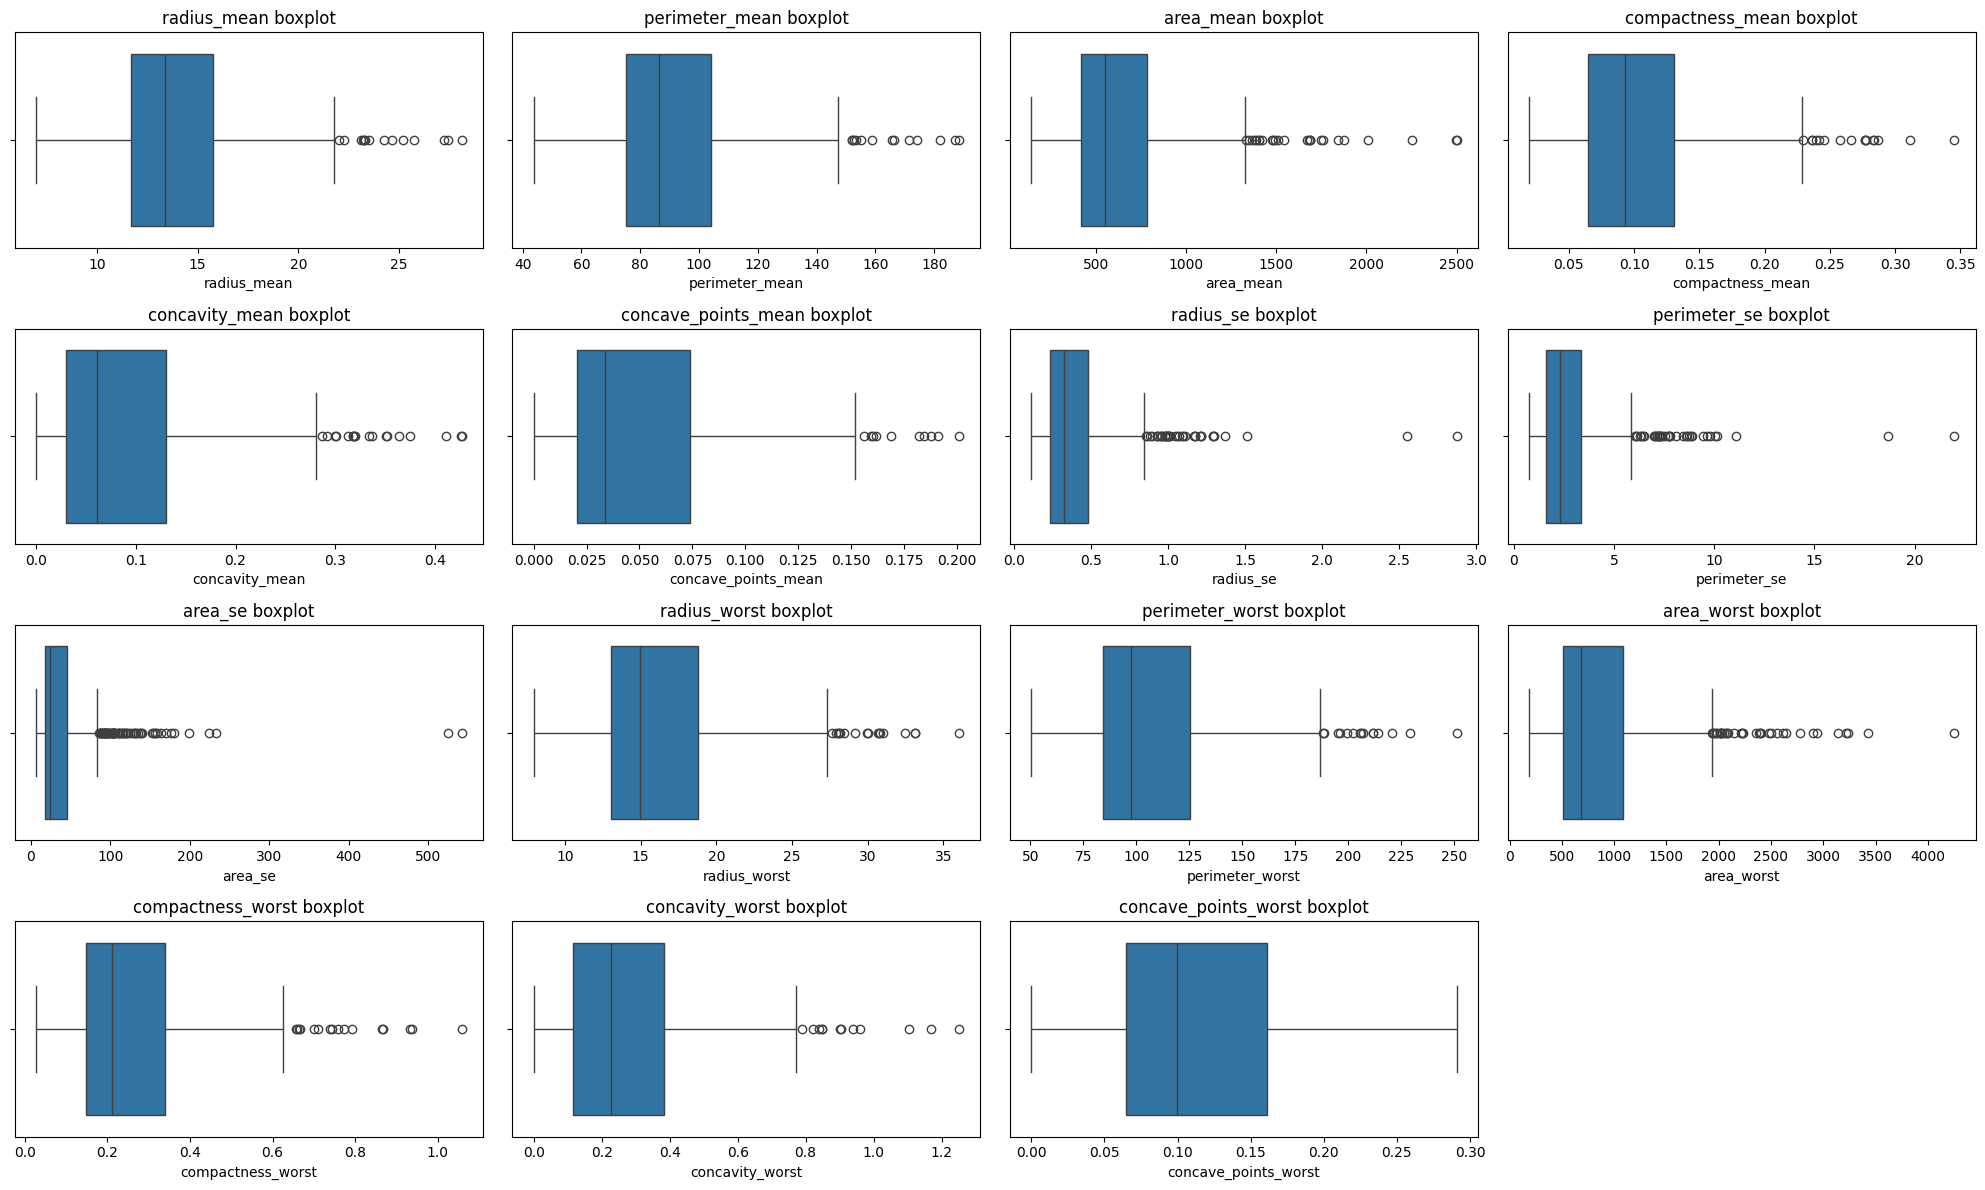

In [304]:
#check about outliers
num_cols = df.select_dtypes("number").columns

n_cols = 4
n_rows = (len(num_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3 * n_rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i], orient="h")
    axes[i].set_title(f"{col} boxplot")
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [305]:
#remove outliers
for col in num_cols:
  Q1=df[col].quantile(.25)
  Q3=df[col].quantile(.75)
  IQR=Q3-Q1
  lower_Fence=Q1-1.5*IQR
  upper_Fence=Q3+1.5*IQR
  lower_outliers=df[df[col]<lower_Fence][col].values
  upper_outliers=df[df[col]>upper_Fence][col].values
  df[col].replace(lower_outliers,lower_Fence,inplace=True)
  df[col].replace(upper_outliers,upper_Fence,inplace=True)

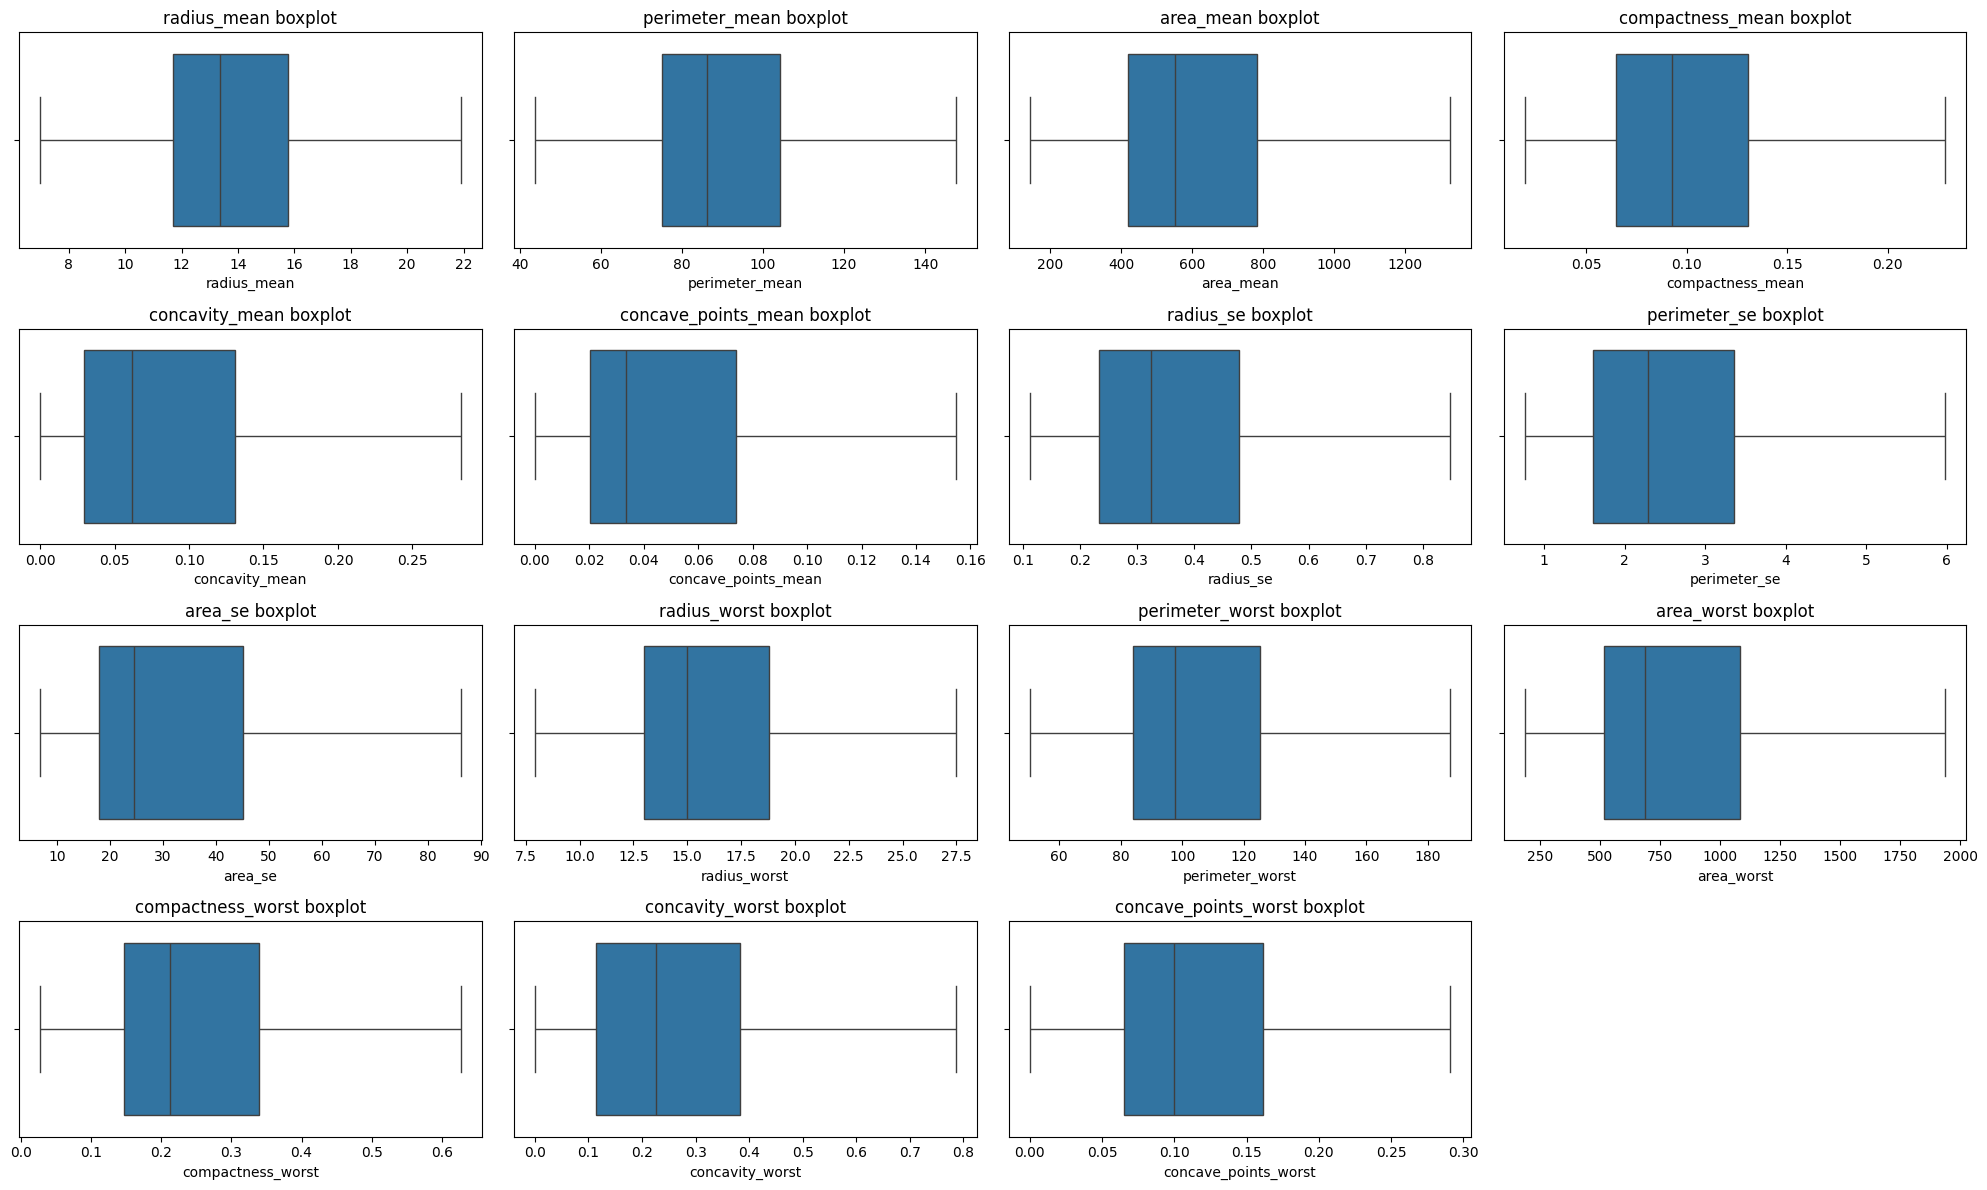

In [306]:
#check about outliers
num_cols = df.select_dtypes("number").columns

n_cols = 4
n_rows = (len(num_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3 * n_rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i], orient="h")
    axes[i].set_title(f"{col} boxplot")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [307]:
#spliting the data
x=df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [308]:
#normalize numerical columns
num_cols=x.select_dtypes('number').columns
scaler=MinMaxScaler()
scaler.fit(x[num_cols])
x[num_cols]=scaler.transform(x[num_cols])
x

,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave_points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave_points_worst
0,0.737918,0.761873,0.724975,1.000000,1.000000,0.951888,1.000000,1.000000,1.000000,0.893497,0.980026,1.000000,1.000000,0.906302,0.912027
1,0.910852,0.859264,0.999746,0.283215,0.307709,0.454072,0.586041,0.505309,0.847351,0.873528,0.791601,1.000000,0.265667,0.307575,0.639175
2,0.851867,0.831300,0.895756,0.671573,0.698984,0.827644,0.860205,0.732421,1.000000,0.800819,0.745591,0.869823,0.662392,0.573393,0.835052
3,0.297540,0.325828,0.205107,1.000000,0.854786,0.680752,0.521061,0.514302,0.257286,0.357399,0.353916,0.218341,1.000000,0.874475,0.884880
4,0.892084,0.880478,0.975228,0.542057,0.701108,0.674928,0.875941,0.895628,1.000000,0.748080,0.743400,0.793333,0.296351,0.509230,0.558419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.977210,0.947013,1.000000,0.461288,0.863638,0.898826,1.000000,1.000000,1.000000,0.897081,0.844915,1.000000,0.306857,0.522852,0.761512
565,0.881359,0.842872,0.944792,0.401548,0.509897,0.633578,0.887201,0.850665,1.000000,0.806964,0.763849,0.882381,0.275006,0.409293,0.559450
566,0.644748,0.622053,0.604160,0.396291,0.327573,0.343094,0.467883,0.510475,0.525807,0.565796,0.557166,0.535891,0.470450,0.433227,0.487285
567,0.912863,0.928692,0.948174,1.000000,1.000000,0.983596,0.833616,0.959533,1.000000,0.911930,0.980026,0.933756,1.000000,1.000000,0.910653


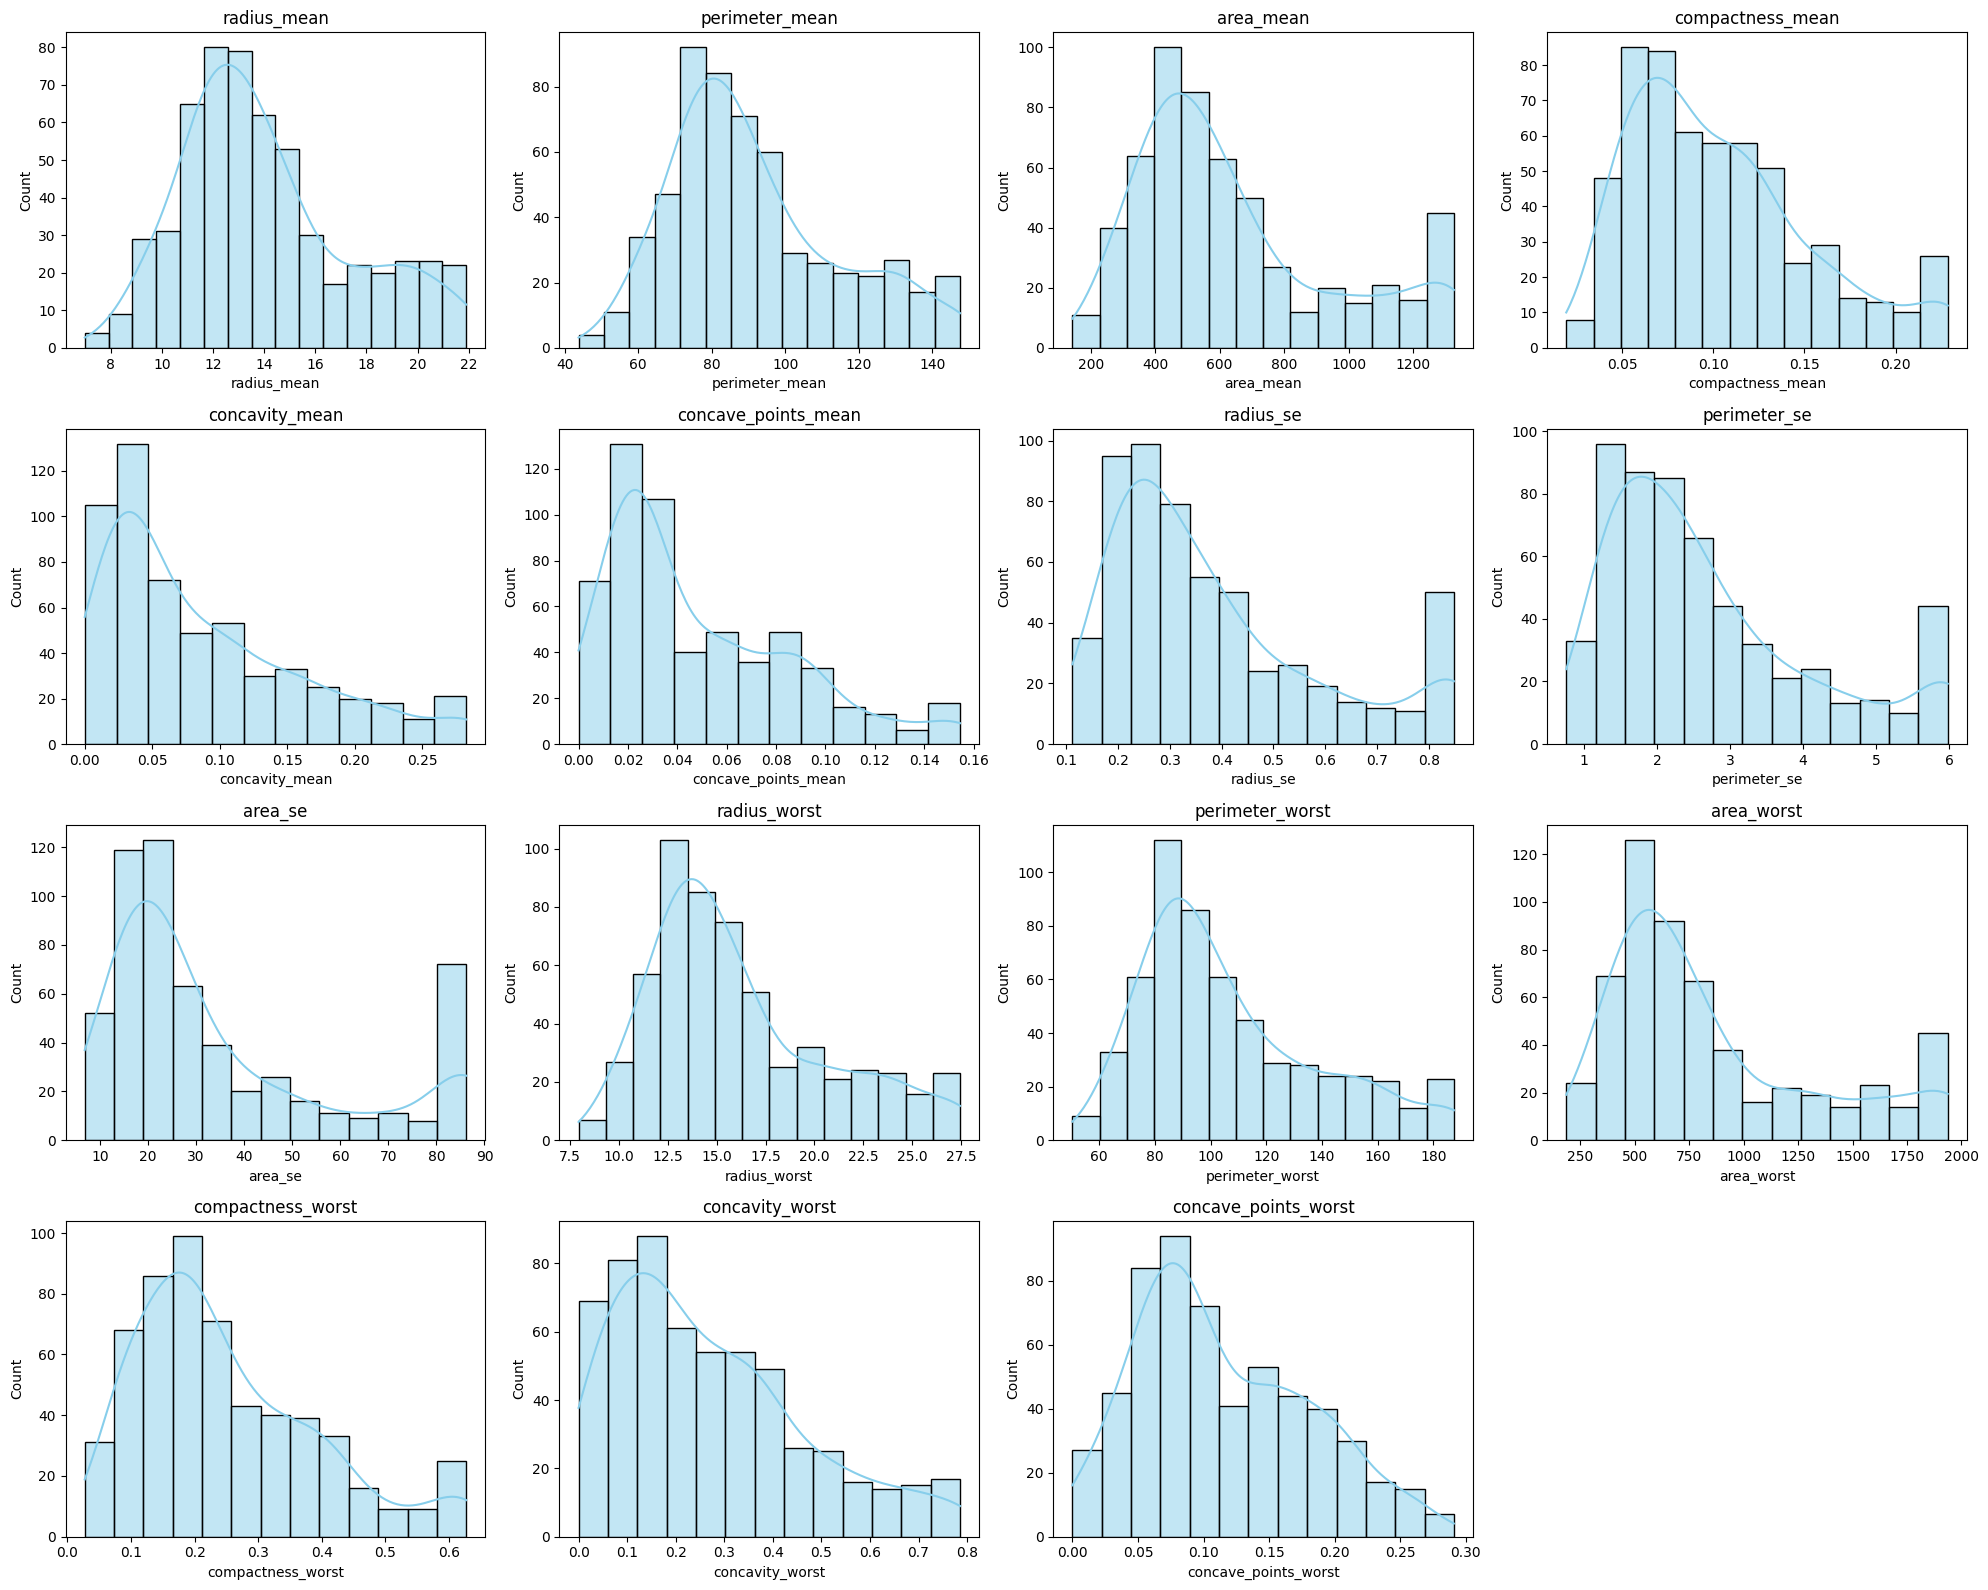

In [309]:
#visualize distribution of numerical columns by histogram
num_cols = df.select_dtypes("number").columns

plt.figure(figsize=(20, 16))
for i, col in enumerate(num_cols):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()

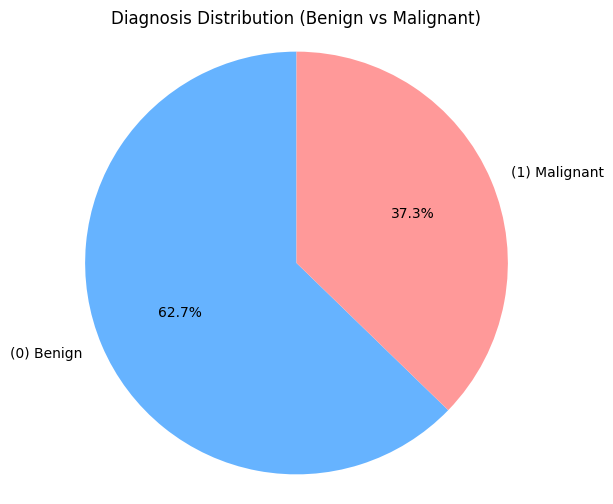

In [310]:
#visualize distribution of categorical columns by pie plot

labels = ['(0) Benign', '(1) Malignant']
values = df['diagnosis'].value_counts().sort_index()

plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'], startangle=90)
plt.title('Diagnosis Distribution (Benign vs Malignant)')
plt.axis('equal')
plt.show()

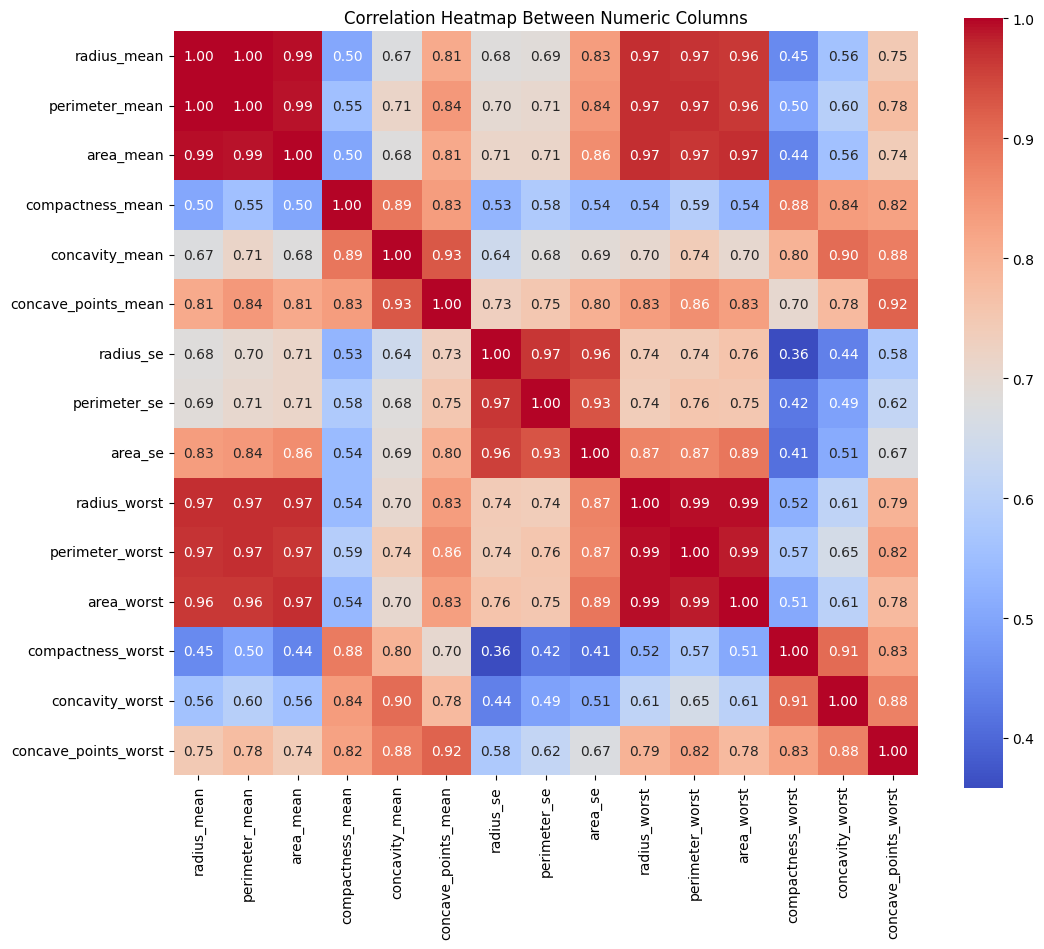

In [311]:
#visualize corelations between all columns by heatmap

num_df = df.select_dtypes(include='number')

corr_matrix = num_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap Between Numeric Columns")
plt.show()

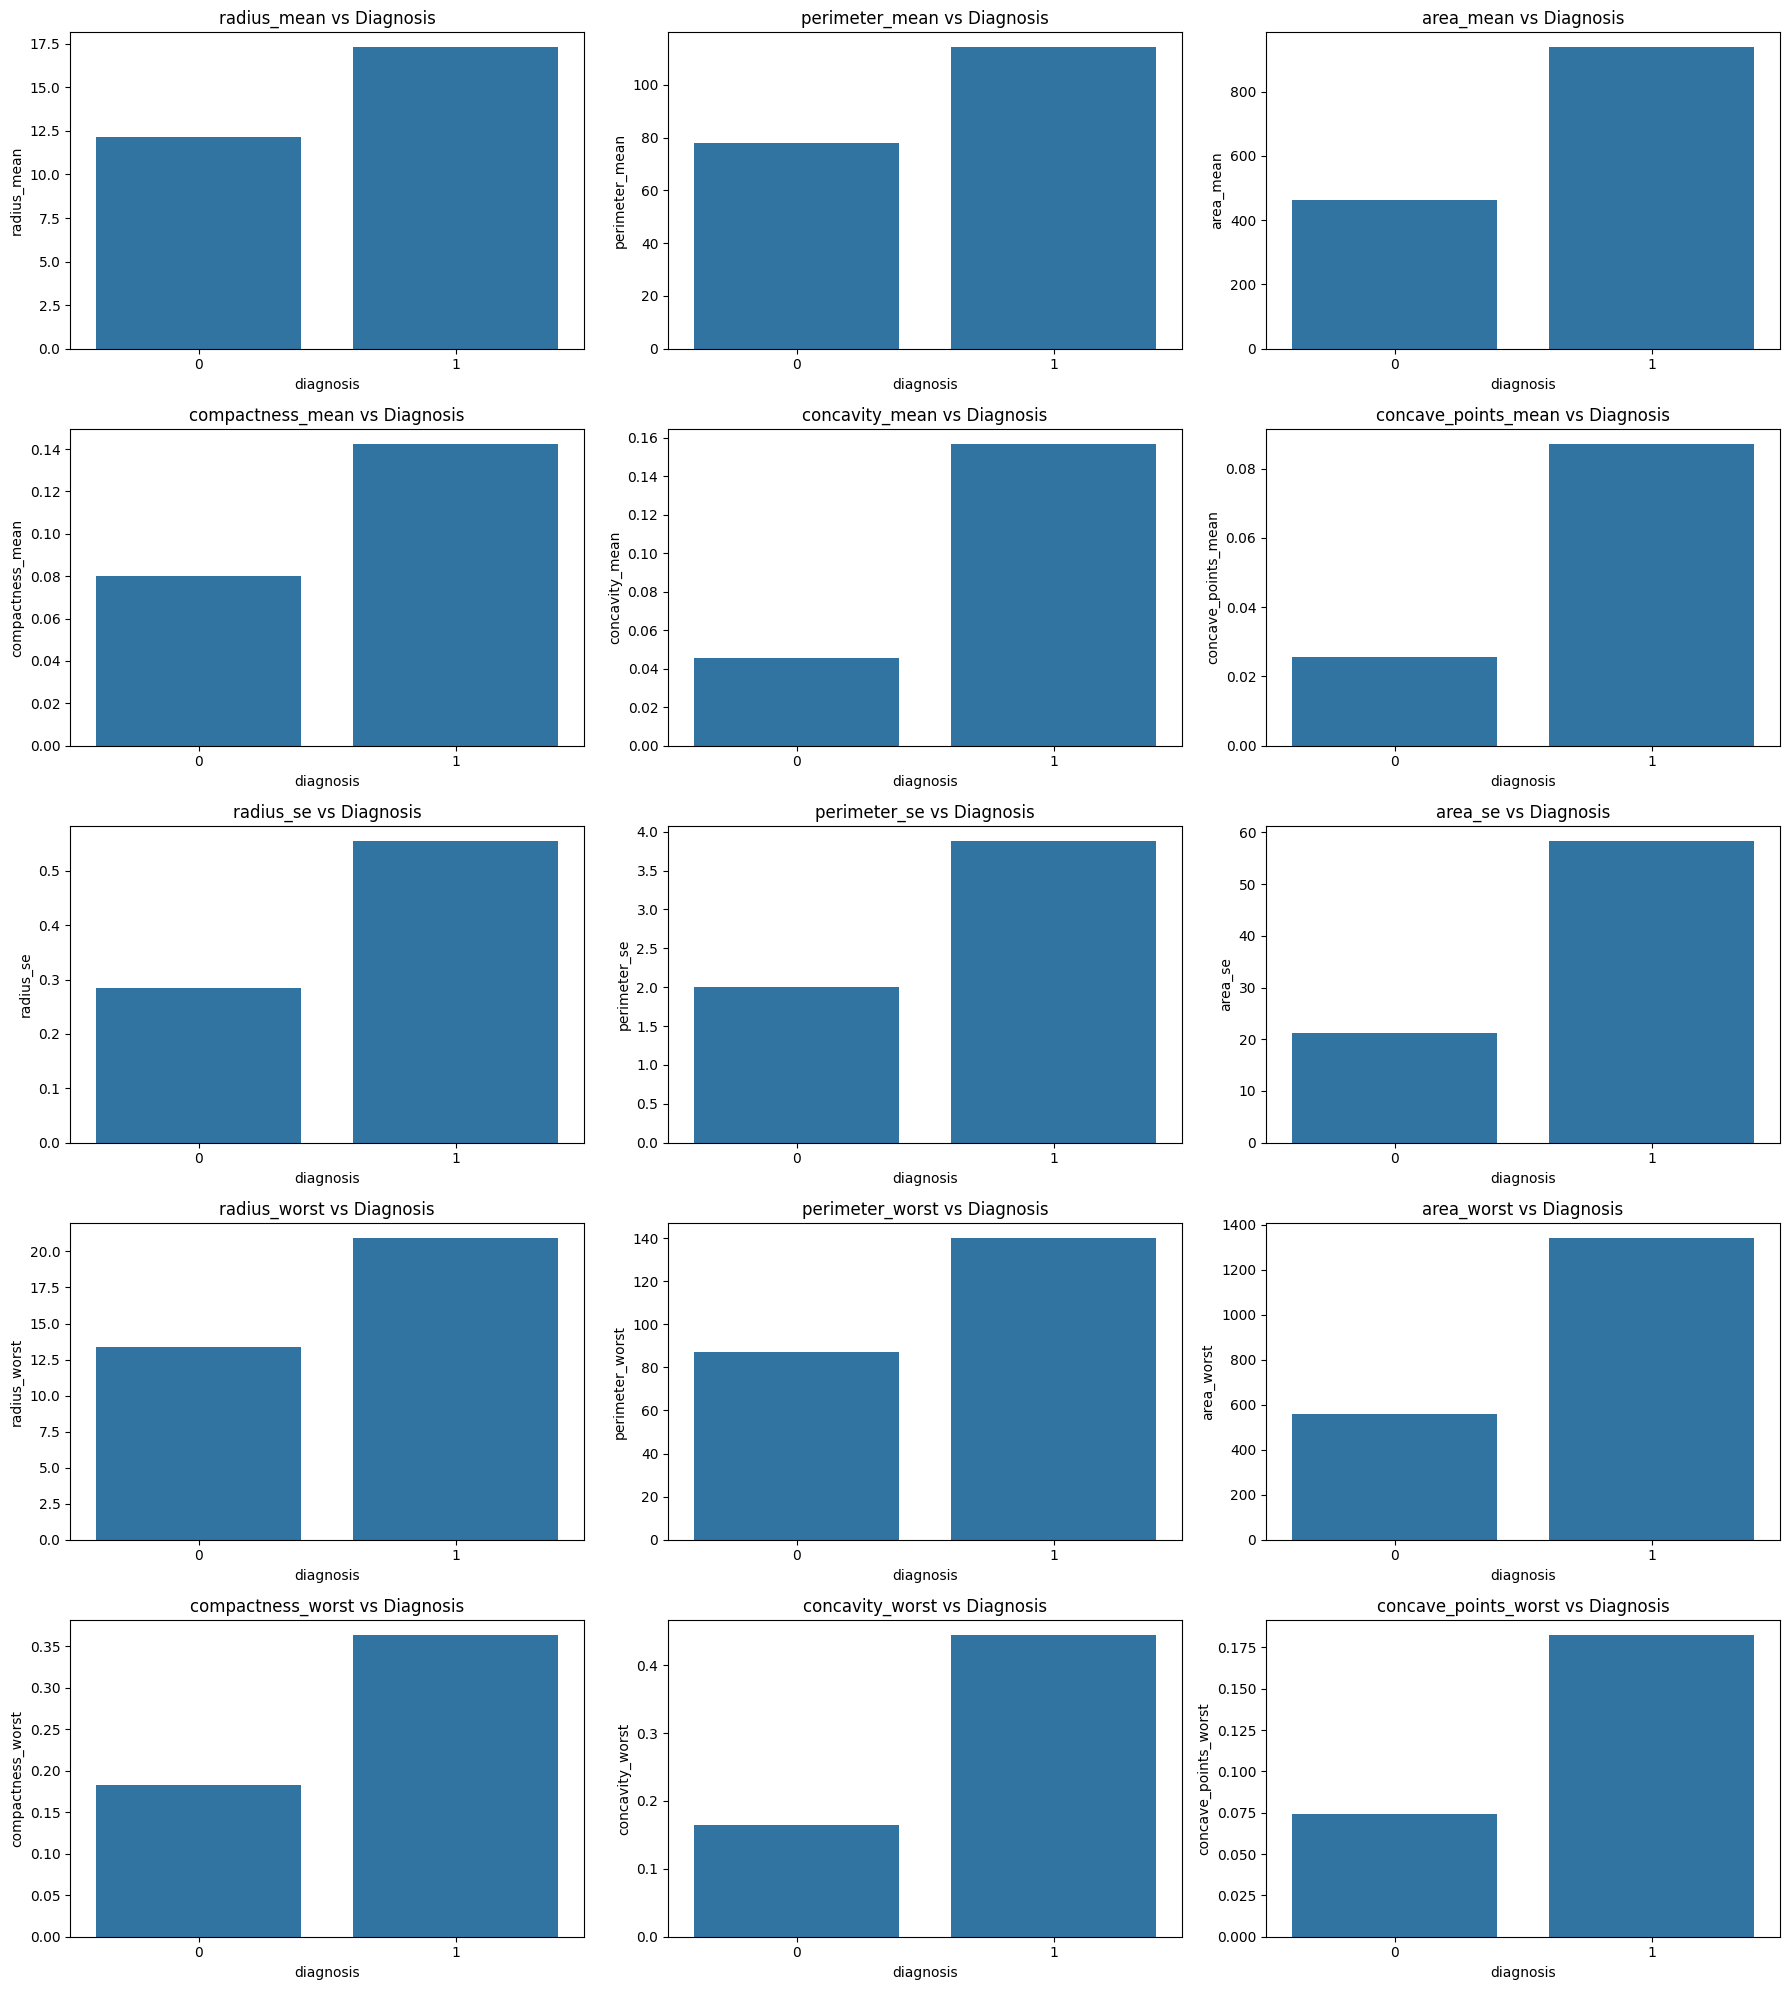

In [312]:
#visualize relation between each column and target column (diagnosis) by barplot

num_cols = df.select_dtypes(include='number').columns

n_cols = 3
n_rows = -(-len(num_cols) // n_cols)

plt.figure(figsize=(6 * n_cols, 4 * n_rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.barplot(x='diagnosis', y=col, data=df, ci=None)
    plt.title(f'{col} vs Diagnosis')

plt.tight_layout()
plt.show()

In [313]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Choose the feature with the highest correlation with 'diagnosis'
X = x[['concave_points_worst']]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Logistic Regression model
model = LogisticRegression()
model.fit(x_train, y_train)

# Make predictions on training and testing data
train_preds = model.predict(x_train)
test_preds = model.predict(x_test)

# Define a function to evaluate model performance
def evaluate(y_true, y_pred, label):
    print(f"--- {label} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))

# Evaluate the model on both training and testing sets
evaluate(y_train, train_preds, "Train")
evaluate(y_test, test_preds, "Test")

# Compute confusion matrix and performance metrics on the test set
cm = confusion_matrix(y_test, test_preds)
accuracy = accuracy_score(y_test, test_preds)
precision = precision_score(y_test, test_preds)
recall = recall_score(y_test, test_preds)
f1 = f1_score(y_test, test_preds)

# Print the evaluation results on the test set
print('--- Evaluation on Test Data ---')
print('Confusion Matrix:\n', cm)
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Plot the sigmoid curve if using only one feature
if x.shape[1] == 1:
    # Generate values across the feature range
    x_vals = np.linspace(x.min()[0], x.max()[0], 300).reshape(-1, 1)
    # Get predicted probabilities for class 1
    y_probs = model.predict_proba(x_vals)[:, 1]

    # Plot training data and sigmoid curve
    plt.scatter(x_train, y_train, label='Train', alpha=0.5)
    plt.plot(x_vals, y_probs, color='red', label='Sigmoid Curve')
    plt.xlabel('Feature')
    plt.ylabel('Probability')
    plt.title('Logistic Regression - Sigmoid Curve')
    plt.legend()
    plt.grid(True)
    plt.show()


--- Train ---
Accuracy: 0.9120879120879121
Precision: 0.910828025477707
Recall: 0.8461538461538461
F1 Score: 0.8773006134969326
--- Test ---
Accuracy: 0.9122807017543859
Precision: 0.9230769230769231
Recall: 0.8372093023255814
F1 Score: 0.8780487804878049
--- Evaluation on Test Data ---
Confusion Matrix:
 [[68  3]
 [ 7 36]]
Accuracy: 0.91
Precision: 0.92
Recall: 0.84
F1 Score: 0.88


In [314]:
# Scale only the selected 7 columns
selected_cols = ['concavity_worst', 'radius_mean', 'concave_points_mean', 'area_se', 'radius_worst', 'perimeter_worst', 'concave_points_worst']
scaler = MinMaxScaler()
x[selected_cols] = scaler.fit_transform(x[selected_cols])
x

,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave_points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave_points_worst
0,0.737918,0.761873,0.724975,1.000000,1.000000,0.951888,1.000000,1.000000,1.000000,0.893497,0.980026,1.000000,1.000000,0.906302,0.912027
1,0.910852,0.859264,0.999746,0.283215,0.307709,0.454072,0.586041,0.505309,0.847351,0.873528,0.791601,1.000000,0.265667,0.307575,0.639175
2,0.851867,0.831300,0.895756,0.671573,0.698984,0.827644,0.860205,0.732421,1.000000,0.800819,0.745591,0.869823,0.662392,0.573393,0.835052
3,0.297540,0.325828,0.205107,1.000000,0.854786,0.680752,0.521061,0.514302,0.257286,0.357399,0.353916,0.218341,1.000000,0.874475,0.884880
4,0.892084,0.880478,0.975228,0.542057,0.701108,0.674928,0.875941,0.895628,1.000000,0.748080,0.743400,0.793333,0.296351,0.509230,0.558419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.977210,0.947013,1.000000,0.461288,0.863638,0.898826,1.000000,1.000000,1.000000,0.897081,0.844915,1.000000,0.306857,0.522852,0.761512
565,0.881359,0.842872,0.944792,0.401548,0.509897,0.633578,0.887201,0.850665,1.000000,0.806964,0.763849,0.882381,0.275006,0.409293,0.559450
566,0.644748,0.622053,0.604160,0.396291,0.327573,0.343094,0.467883,0.510475,0.525807,0.565796,0.557166,0.535891,0.470450,0.433227,0.487285
567,0.912863,0.928692,0.948174,1.000000,1.000000,0.983596,0.833616,0.959533,1.000000,0.911930,0.980026,0.933756,1.000000,1.000000,0.910653


In [315]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(x_train, y_train)

# Predict on train and test sets
train_preds_dt = dt_model.predict(x_train)
test_preds_dt = dt_model.predict(x_test)

# Define a function to evaluate model performance
def evaluate(y_true, y_pred, label):
    print(f"--- {label} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))

# Evaluate performance on train and test data
evaluate(y_train, train_preds_dt, "Train - Decision Tree")
evaluate(y_test, test_preds_dt, "Test - Decision Tree")

# Compute and display confusion matrix
cm = confusion_matrix(y_test, test_preds_dt)
print("--- Evaluation on Test Data ---")
print("Confusion Matrix:\n", cm)
print(f"Accuracy: {accuracy_score(y_test, test_preds_dt):.2f}")
print(f"Precision: {precision_score(y_test, test_preds_dt):.2f}")
print(f"Recall: {recall_score(y_test, test_preds_dt):.2f}")
print(f"F1 Score: {f1_score(y_test, test_preds_dt):.2f}")

# Plot prediction curve if using a single feature
if x.shape[1] == 1:
    x_vals = np.linspace(x.min()[0], x.max()[0], 300).reshape(-1, 1)
    y_preds_line = dt_model.predict(x_vals)

    # Plot training and testing points
    plt.scatter(x_train, y_train, color='blue', alpha=0.5, label='Train')
    plt.scatter(x_test, y_test, color='red', alpha=0.5, label='Test')
    
    # Plot Decision Tree prediction steps
    plt.plot(x_vals, y_preds_line, color='black', label='Decision Tree Prediction')

    plt.xlabel('Feature')
    plt.ylabel('Prediction')
    plt.title('Decision Tree Classifier - Prediction Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

--- Train - Decision Tree ---
Accuracy: 0.9692307692307692
Precision: 0.9585798816568047
Recall: 0.9585798816568047
F1 Score: 0.9585798816568047
--- Test - Decision Tree ---
Accuracy: 0.9385964912280702
Precision: 0.95
Recall: 0.8837209302325582
F1 Score: 0.9156626506024096
--- Evaluation on Test Data ---
Confusion Matrix:
 [[69  2]
 [ 5 38]]
Accuracy: 0.94
Precision: 0.95
Recall: 0.88
F1 Score: 0.92


the decision tree  has higher accurcy and f1 score than logistic regression so,the best model is decision tree 

In [316]:
# Save both model and scaler
import joblib
joblib.dump(dt_model, "decision_tree_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']